findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.
findfont: Font family 'Yanone Kaffeesatz' not found.


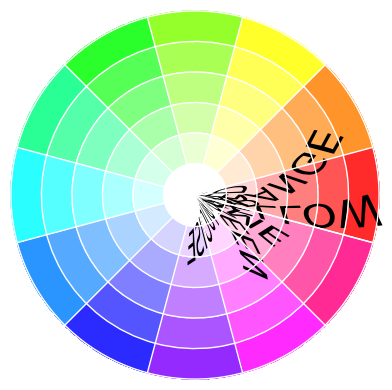

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.collections import QuadMesh
from matplotlib.font_manager import FontProperties

from matplotlib.transforms import Affine2D

def polar_text(ax, text, angle, radius=1, scale=0.005, family="sans"):
    """Draws curved text on a polar plot with proper scaling and orientation."""
    prop = FontProperties(family=family, weight="regular")
    path = TextPath((0, 0), text, size=1, prop=prop)

    # Compute scaling factor based on radius
    transform = Affine2D().scale(scale * radius)

    # Rotate text along the curve
    transform.rotate(angle)

    # Move text to the desired radius
    transform.translate(radius * np.cos(angle), radius * np.sin(angle))

    # Apply transformation to text path
    path = transform.transform_path(path)

    # Create a patch and add it to the axis
    patch = PathPatch(path, facecolor="black", linewidth=0, clip_on=False)
    ax.add_patch(patch)


# Polar imshow using quadmesh
def polar_imshow(ax, Z, extents=[0, 1, 0, 2 * np.pi], vmin=None, vmax=None, cmap="viridis"):
    Z = np.atleast_3d(Z)
    nr, nt, d = Z.shape
    rmin, rmax, tmin, tmax = extents

    if d == 1:
        cmap = plt.get_cmap(cmap)
        vmin = vmin or Z.min()
        vmax = vmax or Z.max()
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        facecolors = cmap(norm(Z.squeeze()))
    else:
        facecolors = Z.reshape(nr, nt, 3)

    R = np.linspace(rmin, rmax, nr)
    T = np.linspace(tmin, tmax, nt)
    T, R = np.meshgrid(T, R)

    X, Y = R * np.cos(T), R * np.sin(T)
    
    # Use pcolormesh instead of QuadMesh
    collection = ax.pcolormesh(T, R, facecolors, shading="auto", rasterized=True)
    return collection


radius = 0
scale = 2
family = "Yanone Kaffeesatz"

fig = plt.figure(figsize=(8, 4))

# -----------------------------------------------------------------------------
ax = fig.add_subplot(1, 1, 1, polar=True, frameon=False)
n = 100
R = np.linspace(0, 1, n)
R -= R % (1 / 5.99)
T = np.linspace(0, 1, 10 * n)
T -= T % (1 / 11.99)
T, R = np.meshgrid(T, R)
H, S, V = T, R, np.ones_like(T)
Z = colors.hsv_to_rgb(np.dstack([H, S, V]))
polar_imshow(ax, Z)
ax.set_xticks(np.linspace(0, 2 * np.pi, 13))
ax.set_yticks(np.linspace(0, 1, 7))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(linewidth=1, color="white")
labels = [
    "red",
    "orange",
    "yellow",
    "lime",
    "green",
    "turquoise",
    "cyan",
    "skyblue",
    "blue",
    "violet",
    "purple",
    "magenta",
]
for label, x in zip(labels, np.linspace(0.5, 12.5, 12)):
    label = label.upper()
    angle = x / 13 * 2 * np.pi
    polar_text(
        ax=ax, text=label.upper(), family=family, angle=angle, radius=0.005, scale=50
    )
ax.set_theta_offset(-np.pi / 12)

#R = np.ones(100)
#T = np.linspace(0, 2 * np.pi, 100)
#ax.plot(T, R, color="white")

plt.tight_layout()
plt.show()

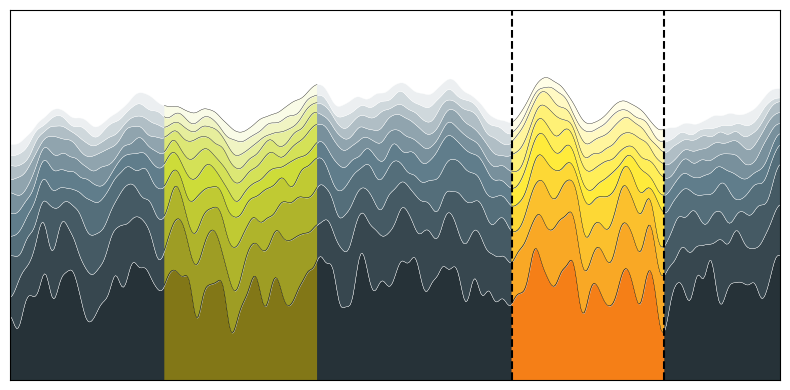

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

material = {
    "red": {
        0: "#ffebee",
        1: "#ffcdd2",
        2: "#ef9a9a",
        3: "#e57373",
        4: "#ef5350",
        5: "#f44336",
        6: "#e53935",
        7: "#d32f2f",
        8: "#c62828",
        9: "#b71c1c",
    },
    "pink": {
        0: "#fce4ec",
        1: "#f8bbd0",
        2: "#f48fb1",
        3: "#f06292",
        4: "#ec407a",
        5: "#e91e63",
        6: "#d81b60",
        7: "#c2185b",
        8: "#ad1457",
        9: "#880e4f",
    },
    "purple": {
        0: "#f3e5f5",
        1: "#e1bee7",
        2: "#ce93d8",
        3: "#ba68c8",
        4: "#ab47bc",
        5: "#9c27b0",
        6: "#8e24aa",
        7: "#7b1fa2",
        8: "#6a1b9a",
        9: "#4a148c",
    },
    "deep purple": {
        0: "#ede7f6",
        1: "#d1c4e9",
        2: "#b39ddb",
        3: "#9575cd",
        4: "#7e57c2",
        5: "#673ab7",
        6: "#5e35b1",
        7: "#512da8",
        8: "#4527a0",
        9: "#311b92",
    },
    "indigo": {
        0: "#e8eaf6",
        1: "#c5cae9",
        2: "#9fa8da",
        3: "#7986cb",
        4: "#5c6bc0",
        5: "#3f51b5",
        6: "#3949ab",
        7: "#303f9f",
        8: "#283593",
        9: "#1a237e",
    },
    "blue": {
        0: "#e3f2fd",
        1: "#bbdefb",
        2: "#90caf9",
        3: "#64b5f6",
        4: "#42a5f5",
        5: "#2196f3",
        6: "#1e88e5",
        7: "#1976d2",
        8: "#1565c0",
        9: "#0d47a1",
    },
    "light blue": {
        0: "#e1f5fe",
        1: "#b3e5fc",
        2: "#81d4fa",
        3: "#4fc3f7",
        4: "#29b6f6",
        5: "#03a9f4",
        6: "#039be5",
        7: "#0288d1",
        8: "#0277bd",
        9: "#01579b",
    },
    "cyan": {
        0: "#e0f7fa",
        1: "#b2ebf2",
        2: "#80deea",
        3: "#4dd0e1",
        4: "#26c6da",
        5: "#00bcd4",
        6: "#00acc1",
        7: "#0097a7",
        8: "#00838f",
        9: "#006064",
    },
    "teal": {
        0: "#e0f2f1",
        1: "#b2dfdb",
        2: "#80cbc4",
        3: "#4db6ac",
        4: "#26a69a",
        5: "#009688",
        6: "#00897b",
        7: "#00796b",
        8: "#00695c",
        9: "#004d40",
    },
    "green": {
        0: "#e8f5e9",
        1: "#c8e6c9",
        2: "#a5d6a7",
        3: "#81c784",
        4: "#66bb6a",
        5: "#4caf50",
        6: "#43a047",
        7: "#388e3c",
        8: "#2e7d32",
        9: "#1b5e20",
    },
    "light green": {
        0: "#f1f8e9",
        1: "#dcedc8",
        2: "#c5e1a5",
        3: "#aed581",
        4: "#9ccc65",
        5: "#8bc34a",
        6: "#7cb342",
        7: "#689f38",
        8: "#558b2f",
        9: "#33691e",
    },
    "lime": {
        0: "#f9fbe7",
        1: "#f0f4c3",
        2: "#e6ee9c",
        3: "#dce775",
        4: "#d4e157",
        5: "#cddc39",
        6: "#c0ca33",
        7: "#afb42b",
        8: "#9e9d24",
        9: "#827717",
    },
    "yellow": {
        0: "#fffde7",
        1: "#fff9c4",
        2: "#fff59d",
        3: "#fff176",
        4: "#ffee58",
        5: "#ffeb3b",
        6: "#fdd835",
        7: "#fbc02d",
        8: "#f9a825",
        9: "#f57f17",
    },
    "amber": {
        0: "#fff8e1",
        1: "#ffecb3",
        2: "#ffe082",
        3: "#ffd54f",
        4: "#ffca28",
        5: "#ffc107",
        6: "#ffb300",
        7: "#ffa000",
        8: "#ff8f00",
        9: "#ff6f00",
    },
    "orange": {
        0: "#fff3e0",
        1: "#ffe0b2",
        2: "#ffcc80",
        3: "#ffb74d",
        4: "#ffa726",
        5: "#ff9800",
        6: "#fb8c00",
        7: "#f57c00",
        8: "#ef6c00",
        9: "#e65100",
    },
    "deep orange": {
        0: "#fbe9e7",
        1: "#ffccbc",
        2: "#ffab91",
        3: "#ff8a65",
        4: "#ff7043",
        5: "#ff5722",
        6: "#f4511e",
        7: "#e64a19",
        8: "#d84315",
        9: "#bf360c",
    },
    "brown": {
        0: "#efebe9",
        1: "#d7ccc8",
        2: "#bcaaa4",
        3: "#a1887f",
        4: "#8d6e63",
        5: "#795548",
        6: "#6d4c41",
        7: "#5d4037",
        8: "#4e342e",
        9: "#3e2723",
    },
    "grey": {
        0: "#fafafa",
        1: "#f5f5f5",
        2: "#eeeeee",
        3: "#e0e0e0",
        4: "#bdbdbd",
        5: "#9e9e9e",
        6: "#757575",
        7: "#616161",
        8: "#424242",
        9: "#212121",
    },
    "blue grey": {
        0: "#eceff1",
        1: "#cfd8dc",
        2: "#b0bec5",
        3: "#90a4ae",
        4: "#78909c",
        5: "#607d8b",
        6: "#546e7a",
        7: "#455a64",
        8: "#37474f",
        9: "#263238",
    },
}


np.random.seed(1)
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

X = np.linspace(0, 1, 500)

Y0 = np.ones(len(X))
for i in range(10):
    Y = Y0 + np.random.uniform(0, 1 / (i + 1), len(X))
    Y = gaussian_filter1d(Y, 3)
    ax.fill_between(
        X,
        Y,
        Y0,
        edgecolor="white",
        linewidth=0.25,
        facecolor=material["blue grey"][9 - i],
    )
    ax.fill_between(
        X[325:425], Y[325:425], Y0[325:425], facecolor=material["yellow"][9 - i]
    )

    ax.fill_between(
        X[100:200], Y[100:200], Y0[100:200], facecolor=material["lime"][9 - i]
    )
    ax.plot(X[325:425], Y[325:425], color="black", linewidth=0.25)
    ax.plot(X[100:200], Y[100:200], color="black", linewidth=0.25)
    Y0 = Y

ax.axvline(X[325], color="black", linestyle="--")
ax.axvline(X[424], color="black", linestyle="--")

ax.set_xlim(0, 1)
ax.set_xticks([])

ax.set_ylim(1, 3)
ax.set_yticks([])

plt.tight_layout()
plt.show()